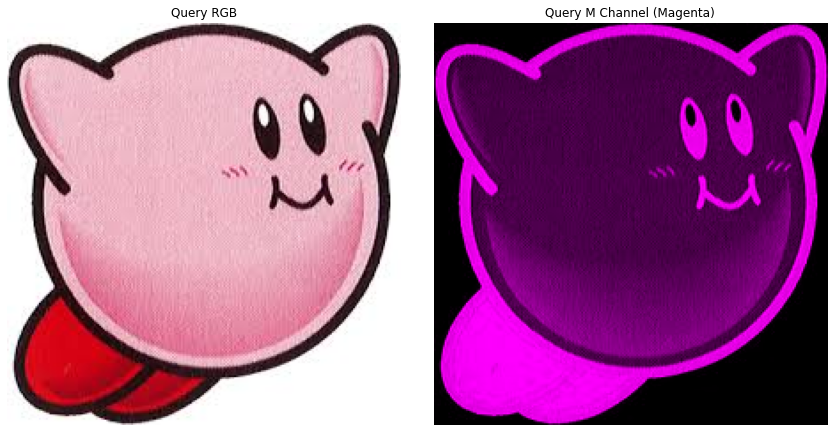

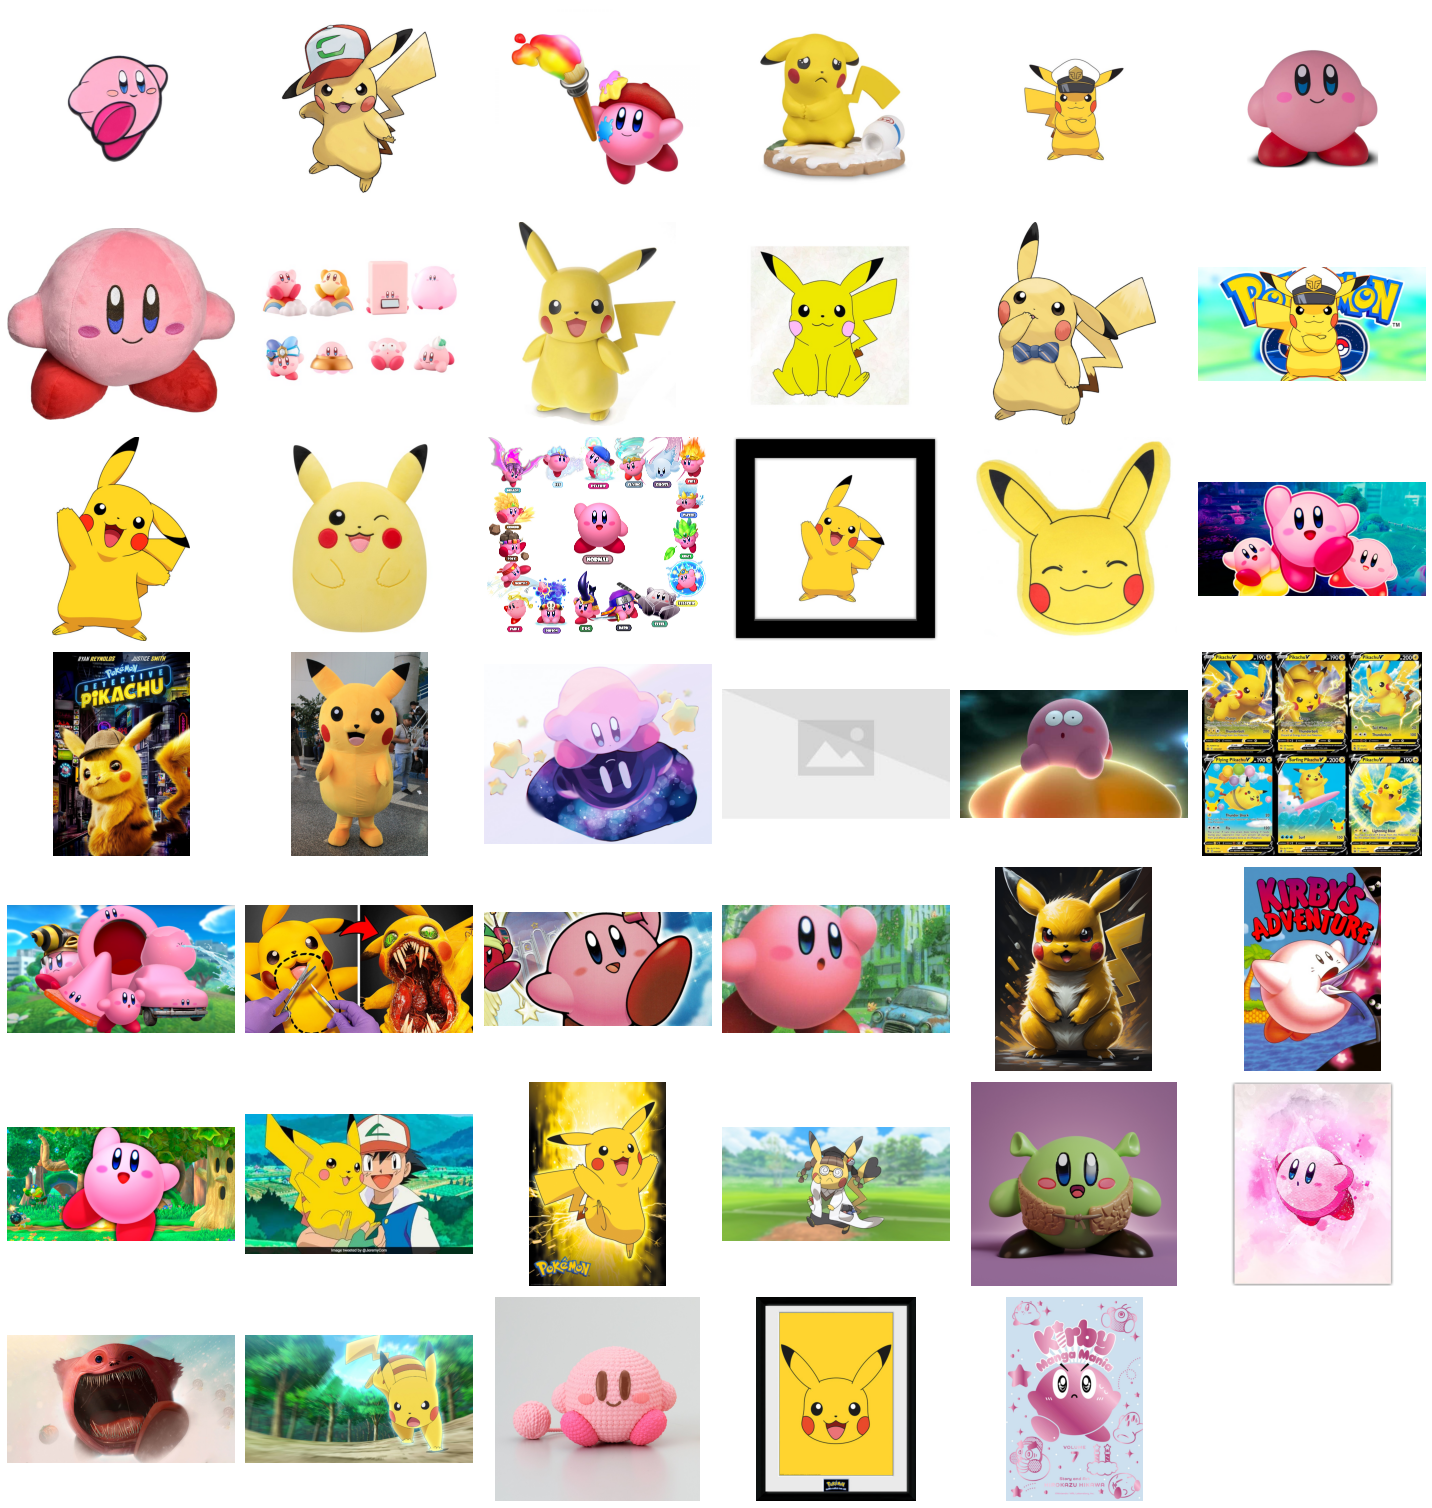

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image

# 定义RGB转M通道函数
def rgb_to_m_channel(image):
    # 使用 PIL 将 RGB 转换为 CMYK
    pil_image = Image.fromarray(image)
    cmyk_image = pil_image.convert('CMYK')
    cmyk_array = np.array(cmyk_image)
    m_channel = cmyk_array[:,:,1]  # 1 表示Magenta通道在CMYK数组中的索引
    return m_channel

# 将M通道映射回Magenta颜色的RGB图像
def m_channel_to_rgb(m_channel):
    m_rgb = np.zeros((m_channel.shape[0], m_channel.shape[1], 3), dtype=np.uint8)
    m_rgb[:,:,0] = m_channel  # Red
    m_rgb[:,:,2] = m_channel  # Blue
    return m_rgb

# 计算两个图像之间的欧氏距离（基于M通道）
def calculate_distance_m_channel(image1, image2):
    # 将图像调整为相同的尺寸，这里选择 (256, 256)
    image1_resized = cv2.resize(image1, (256, 256))
    image2_resized = cv2.resize(image2, (256, 256))
    
    # 转换为M通道图像
    m_channel1 = rgb_to_m_channel(image1_resized)
    m_channel2 = rgb_to_m_channel(image2_resized)
    
    # 计算欧氏距离
    distance = np.sqrt(np.sum((m_channel1 - m_channel2)**2))
    return distance

# 函数化影像读取和处理
def load_images_from_folder(folder_path, exclude_paths=[]):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")
    
    image_paths = sorted(glob.glob(os.path.join(folder_path, "*.jpeg")) + glob.glob(os.path.join(folder_path, "*.jpg")))
    gallery_images = []
    gallery_paths = []
    
    for path in image_paths:
        if path not in exclude_paths:
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                gallery_images.append(img_rgb)
                gallery_paths.append(path)
            else:
                print(f"Error loading image: {path}")
    
    return gallery_images, gallery_paths

# 设置第一个影像文件夹的路径和读取影像
folder_path1 = r"/Users/kellychien/Downloads/測試"

# 排除特定的查询图像
exclude_image_path = r"/Users/kellychien/Downloads/測試/images 1.jpg"

# 加载数据库图像（排除特定的查询图像）
gallery_images1, gallery_paths1 = load_images_from_folder(folder_path1, exclude_paths=[exclude_image_path])

# 假设选择第一个影像作为查询影像
query_image_path = r"/Users/kellychien/Downloads/測試/images 1.jpg"
query_image_rgb = cv2.imread(query_image_path, cv2.IMREAD_COLOR)
if query_image_rgb is not None:
    query_image_rgb = cv2.cvtColor(query_image_rgb, cv2.COLOR_BGR2RGB)

# 计算查询影像与所有影像的距离（基于M通道）
if query_image_rgb is not None:
    distances = []
    for image in gallery_images1:
        dist = calculate_distance_m_channel(query_image_rgb, image)
        distances.append(dist)
    
    sorted_indices = np.argsort(distances)
    
    # 显示查询图像及其M通道图像
    plt.figure(figsize=(12, 6))

    # 显示查询图像的RGB
    plt.subplot(1, 2, 1)
    plt.imshow(query_image_rgb)
    plt.title('Query RGB')
    plt.axis('off')

    # 显示查询图像的M通道图像
    plt.subplot(1, 2, 2)
    m_channel = rgb_to_m_channel(query_image_rgb)
    m_channel_rgb = m_channel_to_rgb(m_channel)
    plt.imshow(m_channel_rgb)
    plt.title('Query M Channel (Magenta)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 显示前60个检索结果的RGB，并显示距离和路径
    num_to_display = min(60, len(gallery_images1))
    plt.figure(figsize=(20, 30))  # 调整图像大小以适应60张图片

    for j in range(num_to_display):  # 显示前 num_to_display 个检索结果
        retrieved_index = sorted_indices[j]
        
        # 显示检索结果的RGB
        plt.subplot(10, 6, j + 1)  # 调整子图布局为 10 行 6 列
        plt.imshow(gallery_images1[retrieved_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Error loading query image: {query_image_path}")


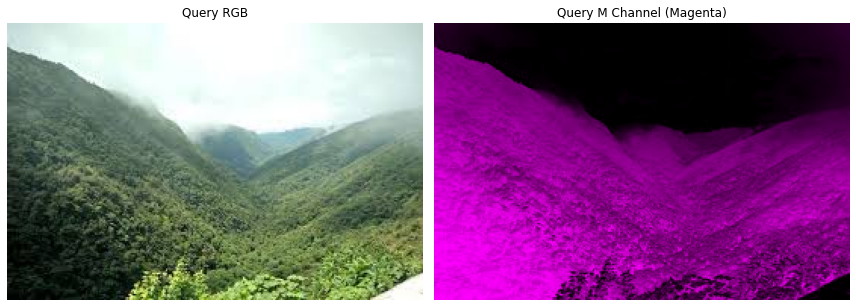

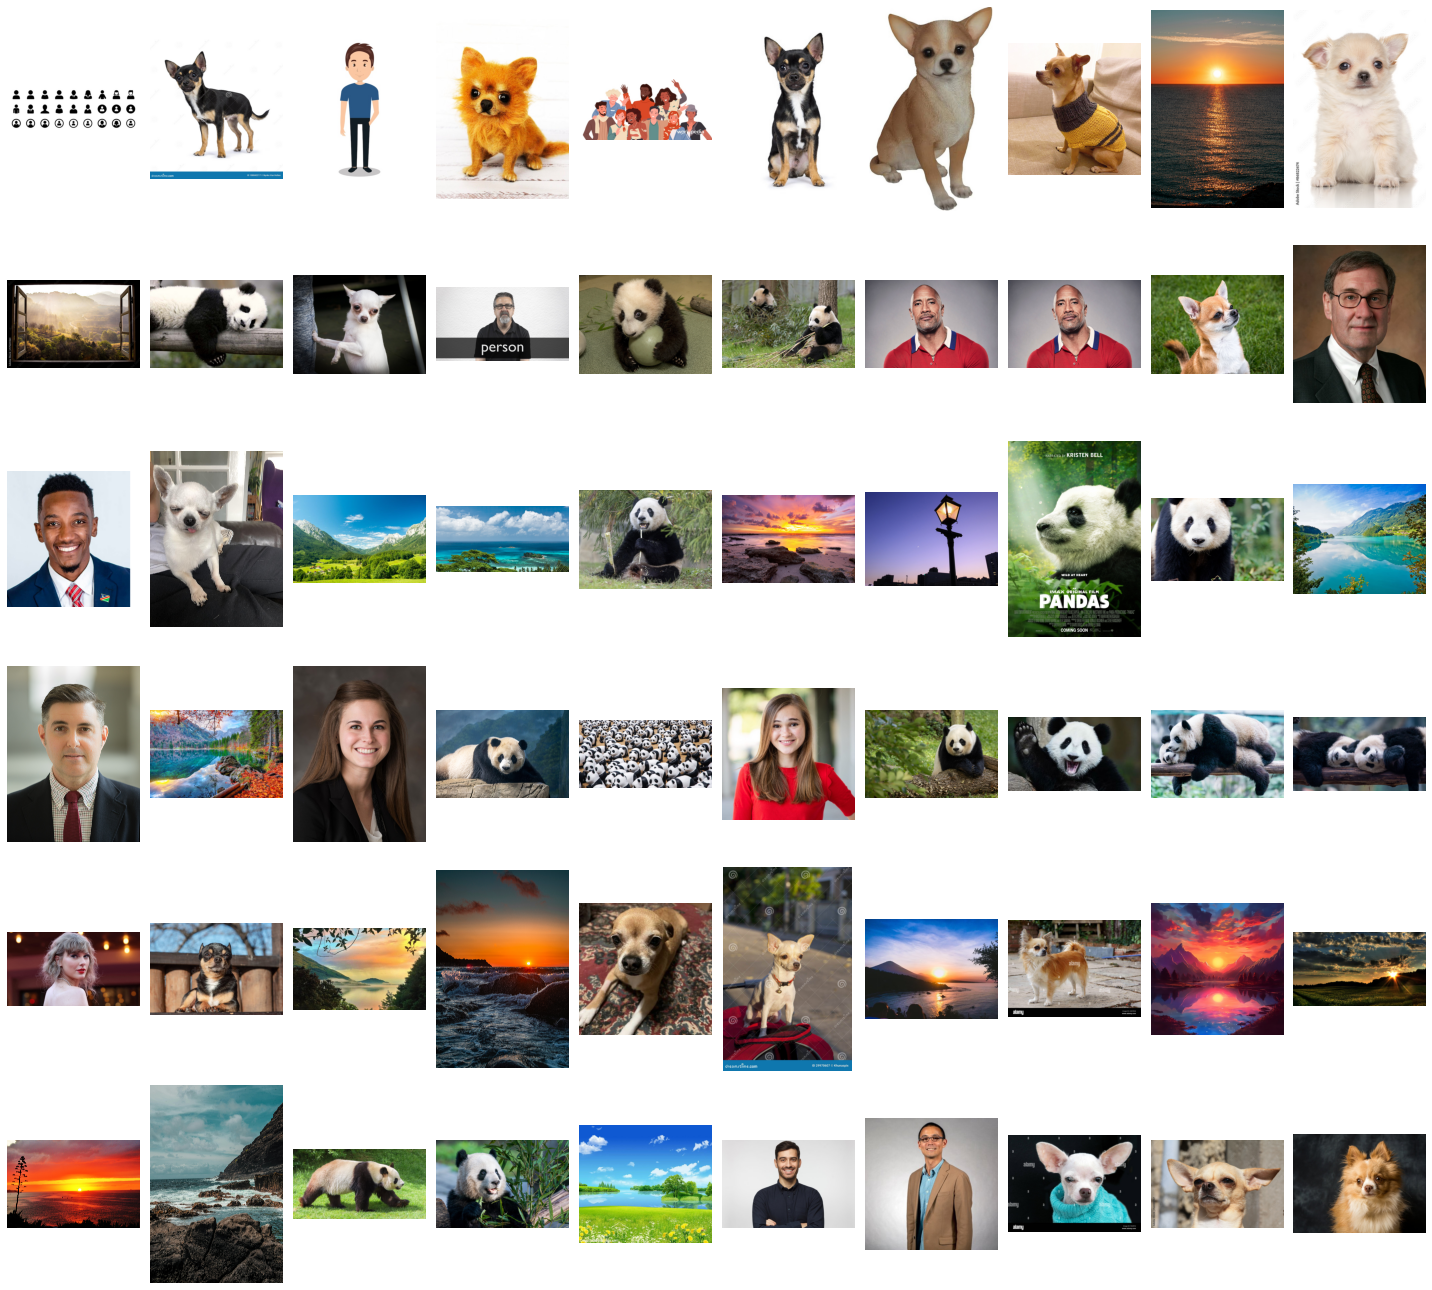

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from PIL import Image

# 定义RGB转M通道函数
def rgb_to_m_channel(image):
    # 使用 PIL 将 RGB 转换为 CMYK
    pil_image = Image.fromarray(image)
    cmyk_image = pil_image.convert('CMYK')
    cmyk_array = np.array(cmyk_image)
    m_channel = cmyk_array[:,:,1]  # 1 表示Magenta通道在CMYK数组中的索引
    return m_channel

# 将M通道映射回Magenta颜色的RGB图像
def m_channel_to_rgb(m_channel):
    m_rgb = np.zeros((m_channel.shape[0], m_channel.shape[1], 3), dtype=np.uint8)
    m_rgb[:,:,0] = m_channel  # Red
    m_rgb[:,:,2] = m_channel  # Blue
    return m_rgb

# 计算两个图像之间的欧氏距离（基于M通道）
def calculate_distance_m_channel(image1, image2):
    # 将图像调整为相同的尺寸，这里选择 (256, 256)
    image1_resized = cv2.resize(image1, (256, 256))
    image2_resized = cv2.resize(image2, (256, 256))
    
    # 转换为M通道图像
    m_channel1 = rgb_to_m_channel(image1_resized)
    m_channel2 = rgb_to_m_channel(image2_resized)
    
    # 计算欧氏距离
    distance = np.sqrt(np.sum((m_channel1 - m_channel2)**2))
    return distance

# 函数化影像读取和处理
def load_images_from_folder(folder_path, exclude_paths=[]):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The folder path '{folder_path}' does not exist.")
    
    image_paths = sorted(glob.glob(os.path.join(folder_path, "*.jpeg")) + glob.glob(os.path.join(folder_path, "*.jpg")))
    gallery_images = []
    gallery_paths = []
    
    for path in image_paths:
        if path not in exclude_paths:
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            if img is not None:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                gallery_images.append(img_rgb)
                gallery_paths.append(path)
            else:
                print(f"Error loading image: {path}")
    
    return gallery_images, gallery_paths

# 设置第一个影像文件夹的路径和读取影像
folder_path1 = r"/Users/kellychien/Downloads/(2)"

# 排除特定的查询图像
exclude_image_path = r"/Users/kellychien/Downloads/(2)/images.jpg"

# 加载数据库图像（排除特定的查询图像）
gallery_images1, gallery_paths1 = load_images_from_folder(folder_path1, exclude_paths=[exclude_image_path])

# 假设选择第一个影像作为查询影像
query_image_path = r"/Users/kellychien/Downloads/(2)/images.jpg"
query_image_rgb = cv2.imread(query_image_path, cv2.IMREAD_COLOR)
if query_image_rgb is not None:
    query_image_rgb = cv2.cvtColor(query_image_rgb, cv2.COLOR_BGR2RGB)

# 计算查询影像与所有影像的距离（基于M通道）
if query_image_rgb is not None:
    distances = []
    for image in gallery_images1:
        dist = calculate_distance_m_channel(query_image_rgb, image)
        distances.append(dist)
    
    sorted_indices = np.argsort(distances)
    
    # 显示查询图像及其M通道图像
    plt.figure(figsize=(12, 6))

    # 显示查询图像的RGB
    plt.subplot(1, 2, 1)
    plt.imshow(query_image_rgb)
    plt.title('Query RGB')
    plt.axis('off')

    # 显示查询图像的M通道图像
    plt.subplot(1, 2, 2)
    m_channel = rgb_to_m_channel(query_image_rgb)
    m_channel_rgb = m_channel_to_rgb(m_channel)
    plt.imshow(m_channel_rgb)
    plt.title('Query M Channel (Magenta)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 显示前60个检索结果的RGB，并显示距离和路径
    num_to_display = min(60, len(gallery_images1))
    plt.figure(figsize=(20, 30))  # 调整图像大小以适应60张图片

    for j in range(num_to_display):  # 显示前 num_to_display 个检索结果
        retrieved_index = sorted_indices[j]
        
        # 显示检索结果的RGB
        plt.subplot(10, 10, j + 1)  # 调整子图布局为 10 行 6 列
        plt.imshow(gallery_images1[retrieved_index])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print(f"Error loading query image: {query_image_path}")
